<a href="https://colab.research.google.com/github/gustavodelevante/Heart_Attack/blob/main/clean_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



from sklearn.model_selection import train_test_split


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import seaborn as sns 


In [ ]:
# The data is from https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset
heart_df = pd.read_csv("/content/drive/MyDrive/Coding Dojo/Project 2/heart.csv")
heart_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
heart_df.groupby(["output"])[["age"]].mean()

,age
output,
0,56.601449
1,52.496970


In [ ]:
heart_df.groupby(["output","sex"])[["age"]].mean()  # sex = 1 = woman 

age
output sex           
0      0    59.041667
       1    56.087719
1      0    54.555556
       1    50.903226

In [ ]:
# differen list 
# inspired by https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
# different seperations on the data 

male_lis = heart_df.loc[heart_df["sex"] == 0, :]    # male list 
female_lis = heart_df.loc[heart_df["sex"] == 1, :]    # female list 

high_risk = heart_df.loc[heart_df["output"] == 1, :]
low_risk = heart_df.loc[heart_df["output"] == 0, :]

male_high = male_lis.loc[male_lis["output"] == 1, :]
female_high = female_lis.loc[female_lis["output"] == 1, :]


In [ ]:
print(np.mean(heart_df["age"]))
print(np.median(heart_df["age"]))

54.366336633663366
55.0


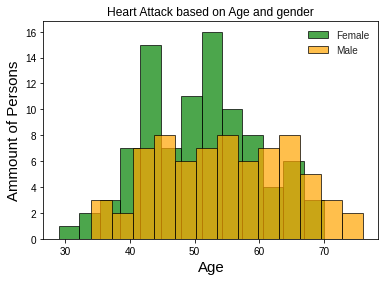

In [ ]:
plt.hist(female_high["age"].tolist(), color="green", edgecolor= "k", bins= 13, alpha= 0.7, label="Female");   # inspired by https://stackoverflow.com/questions/6871201/plot-two-histograms-on-single-chart-with-matplotlib
plt.hist(male_high["age"].tolist(), color="orange", edgecolor= "k", bins= 13, alpha= 0.7,label= "Male");
plt.style.use("seaborn")
plt.legend();
plt.title("Heart Attack based on Age and gender");
plt.xlabel("Age", fontsize= 15);
plt.ylabel("Ammount of Persons", fontsize= 15);



plt.savefig("HeartAttack_age.png");

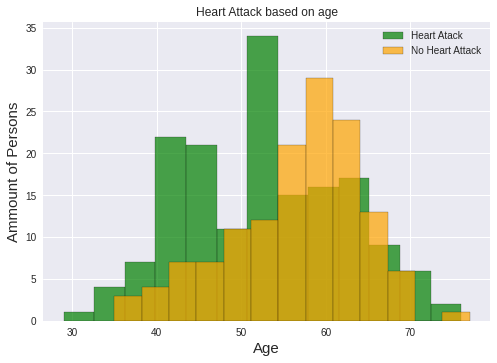

In [ ]:
plt.hist(high_risk["age"].tolist(), color="green", edgecolor= "k", bins= 13, alpha= 0.7, label="Heart Atack");   
plt.hist(low_risk["age"].tolist(), color="orange", edgecolor= "k", bins= 13, alpha= 0.7,label= "No Heart Attack");
plt.style.use("seaborn")
plt.legend();
plt.title("Heart Attack based on age");
plt.xlabel("Age", fontsize= 15);
plt.ylabel("Ammount of Persons", fontsize= 15);


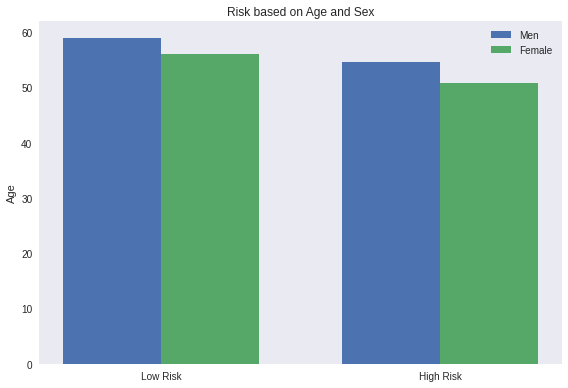

In [ ]:

width = 0.35
label = ["Low Risk", "High Risk"]
x = np.arange(len(label))
men_age = [np.mean(male_lis["age"].loc[male_lis["output"] == 0]),np.mean(male_lis["age"].loc[male_lis["output"] == 1])]
female_age =[np.mean(female_lis["age"].loc[female_lis["output"] == 0]),np.mean(female_lis["age"].loc[female_lis["output"] == 1])] 


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_age, width, label='Men')
rects2 = ax.bar(x + width/2, female_age, width, label='Female')

ax.set_ylabel('Age')
ax.set_title('Risk based on Age and Sex')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.legend()


fig.tight_layout()
plt.grid()


fig.tight_layout()
plt.savefig("Risk_based_age_gender.png");
plt.show()



In [ ]:
heart_df.groupby(["output","sex"])[["chol"]].mean() 

chol
output sex            
0      0    274.958333
       1    246.061404
1      0    256.750000
       1    230.989247

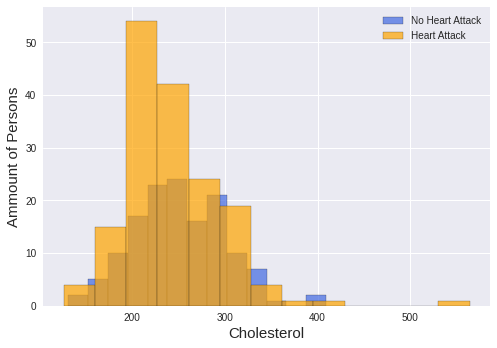

In [ ]:
plt.hist(low_risk["chol"].tolist(), color="royalblue", edgecolor= "k", bins= 13, alpha= 0.7, label="No Heart Attack");   # inspired by https://stackoverflow.com/questions/6871201/plot-two-histograms-on-single-chart-with-matplotlib
plt.hist(high_risk["chol"].tolist(), color="orange", edgecolor= "k", bins= 13, alpha= 0.7,label= "Heart Attack");
plt.style.use("seaborn")
plt.legend();
plt.xlabel("Cholesterol", fontsize= 15);
plt.ylabel("Ammount of Persons", fontsize= 15);



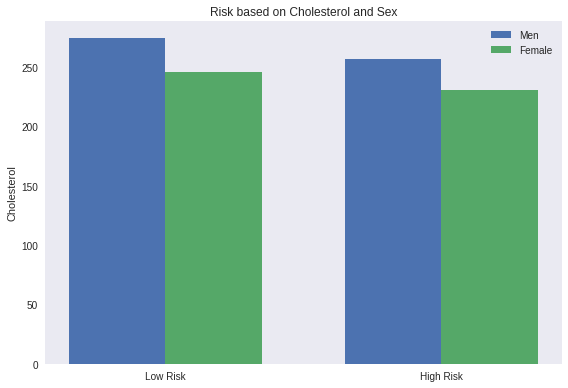

In [ ]:

width = 0.35
label = ["Low Risk", "High Risk"]
x = np.arange(len(label))
men_age = [np.mean(male_lis["chol"].loc[male_lis["output"] == 0]),np.mean(male_lis["chol"].loc[male_lis["output"] == 1])]
female_age =[np.mean(female_lis["chol"].loc[female_lis["output"] == 0]),np.mean(female_lis["chol"].loc[female_lis["output"] == 1])] 


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_age, width, label='Men')
rects2 = ax.bar(x + width/2, female_age, width, label='Female')

ax.set_ylabel("Cholesterol")
ax.set_title('Risk based on Cholesterol and Sex')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.legend()


fig.tight_layout()
plt.grid()


fig.tight_layout()
plt.savefig("Risk_based_Cholesterol.png");
plt.show()



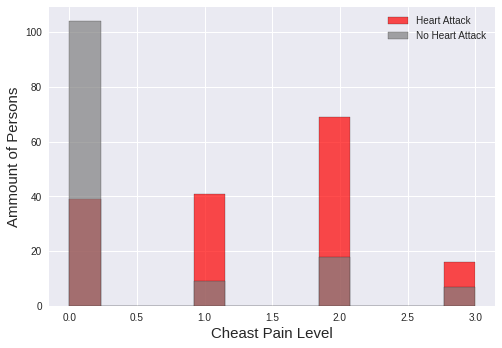

In [ ]:
plt.hist(high_risk["cp"].tolist(), color="red", edgecolor= "k", bins= 13, alpha= 0.7,label= "Heart Attack");
plt.hist(low_risk["cp"].tolist(), color="grey", edgecolor= "k", bins= 13, alpha= 0.7, label="No Heart Attack");   # inspired by https://stackoverflow.com/questions/6871201/plot-two-histograms-on-single-chart-with-matplotlib

plt.style.use("seaborn")
plt.legend();
plt.xlabel("Cheast Pain Level", fontsize= 15);
plt.ylabel("Ammount of Persons", fontsize= 15);


fig.tight_layout()
plt.savefig("Heart_attack_baesd_on_pain.png");

In [ ]:
label = ["Exercise", "No Exercise"]
exercise = []
no_ex_hi = 0
ex_hi = 0
for i in range(len(high_risk["exng"])):
    if high_risk["exng"][i] == 0:
        no_ex_hi += 1 
    elif high_risk["exng"][i] == 1:
        ex_hi +=1 
print("High Risk no Exercise", no_ex_hi, "High Risk Exercise",ex_hi)




High Risk no Exercise 142 High Risk Exercise 23


In [ ]:
no_ex_lo = 0
ex_lo = 0
exng_low_lis = low_risk["exng"].tolist()
for n in range(len(exng_low_lis)):
    if exng_low_lis[n] == 0:
        no_ex_lo += 1 
    elif exng_low_lis[n] == 1:
        ex_lo +=1 
    
print("Low Risk no Exercise", no_ex_lo, "Low Risk Exercise",ex_lo)


Low Risk no Exercise 62 Low Risk Exercise 76


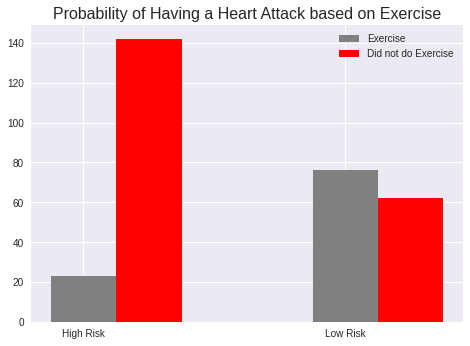

In [ ]:
# used from https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm

data = [[ex_hi, ex_lo],[no_ex_hi, no_ex_lo]]
x = np.arange(2);
fig = plt.figure();

ax = fig.add_axes([0.1,0.1,0.75,0.75]) # axis starts at 0.1, 0.1 FROM https://stackoverflow.com/questions/19576317/matplotlib-savefig-does-not-save-axes
ax.bar(x + 0.00, data[0], color = 'grey', width = 0.25);
ax.bar(x + 0.25, data[1], color = 'red', width = 0.25);
ax.legend(labels= ["Exercise", "Did not do Exercise"]);
plt.title("Probability of Having a Heart Attack based on Exercise", fontsize= 16);

labels = ["High Risk", "Low Risk"];
lneg_2 = np.arange(len(labels)) ;
ax.set_xticks(lneg_2);
ax.set_xticklabels(labels);


plt.savefig("Probability_based_on_Exercise.png");


In [ ]:
X = heart_df.loc[:, heart_df.columns[heart_df.columns != "output"]]
y = heart_df.loc[:, "output"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y)

In [ ]:
rfc = RandomForestClassifier(n_estimators= 500, bootstrap= True)

rfc.fit(X_train, y_train)

print("Training accuracy:", rfc.score(X_train, y_train))
print("Test accuracy: ", rfc.score(X_test, y_test))

Training accuracy: 1.0
Test accuracy:  0.8289473684210527


In [ ]:
scaler= StandardScaler()

scaler.fit(X_train)

X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
log_reg = LogisticRegression(penalty="l1", C= 1.0, solver="liblinear", multi_class="ovr")

log_reg.fit(X_train, y_train)
print("Training accuracy:", log_reg.score(X_train, y_train))
print("Test accuracy: ", log_reg.score(X_test, y_test))


Training accuracy: 0.8634361233480177
Test accuracy:  0.8026315789473685


In [ ]:
log_reg = LogisticRegression(penalty="l2", C= 1.0, solver="liblinear", multi_class="ovr")

log_reg.fit(X_train, y_train)
print("Training accuracy:", log_reg.score(X_train, y_train))
print("Test accuracy: ", log_reg.score(X_test, y_test))

Training accuracy: 0.8590308370044053
Test accuracy:  0.7894736842105263


In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)


print('Training accuracy:', gbc.score(X_train, y_train))
print('Testing accuracy:', gbc.score(X_test, y_test))

Training accuracy: 0.9955947136563876
Testing accuracy: 0.8026315789473685
